# Bike Sharing Assignment

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [355]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Reading & Understanding Data

In [356]:
# Reading Data
bike = pd.read_csv('day.csv')
pd.set_option('display.max_columns', None)

# Displaying first five rows of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [357]:
bike.shape

(730, 16)

In [358]:
# Information of data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Insights
As we can see some columns such as season, month, working day & weather are seem to be integer types, further we will map them categorically.

In [359]:
# Describing the columns of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insights:
After reading data we got to know that we have 730 rows & 16 columns. Except one column i.e dteday, all other are either float/int. There are some feilds having categorical data.

## Checking the data quality

In [360]:
# Checking missing values in %
round((bike.isnull().sum() / len(bike)) * 100)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [361]:
# checking for duplicates

dup = bike.copy()
dup.drop_duplicates(subset=None, inplace=True)
dup.shape

(730, 16)

#### Insights:
There are no null values in the dataset. There is no duplicate values as we got the same shape for "dup" variable as for "bike" data.

## Droping Unwanted Data

**Droping the following columns:**
1. **instant** - has only index for the row,
2. **dteday** - since we already have seperate columns for 'year' & 'month',
3. **casual & registered** - seems to be the breakup by category for cnt column.

In [362]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], inplace=True, axis=1)

In [363]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping Columns 

1. season : season (1:spring, 2:summer, 3:fall, 4:winter),
2. mnth : month ( 1 to 12) in names,
3. weekday : days of the week,
4. weathersit : (1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain').

In [364]:
bike.season = bike.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

## Exploratory Data Analysis

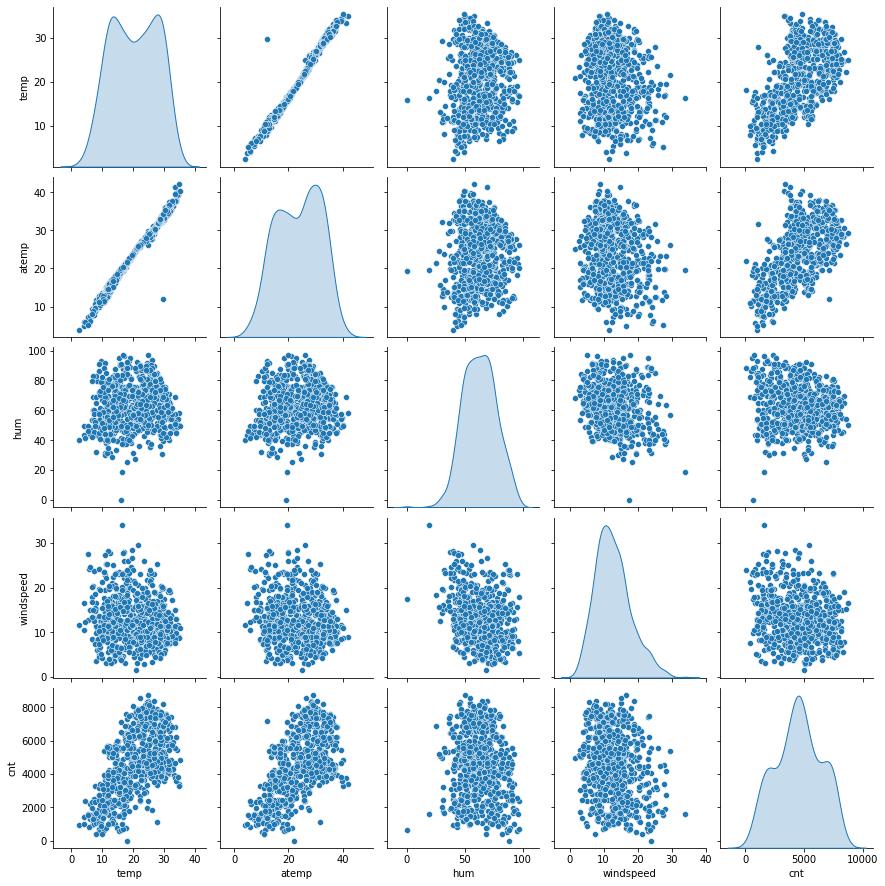

In [434]:
# Visualising Numerical Variable

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike[num_var], diag_kind='kde')
plt.show()

#### Insights:
variable 'temp', 'atemp' & 'cnt' are having Linear Relationship

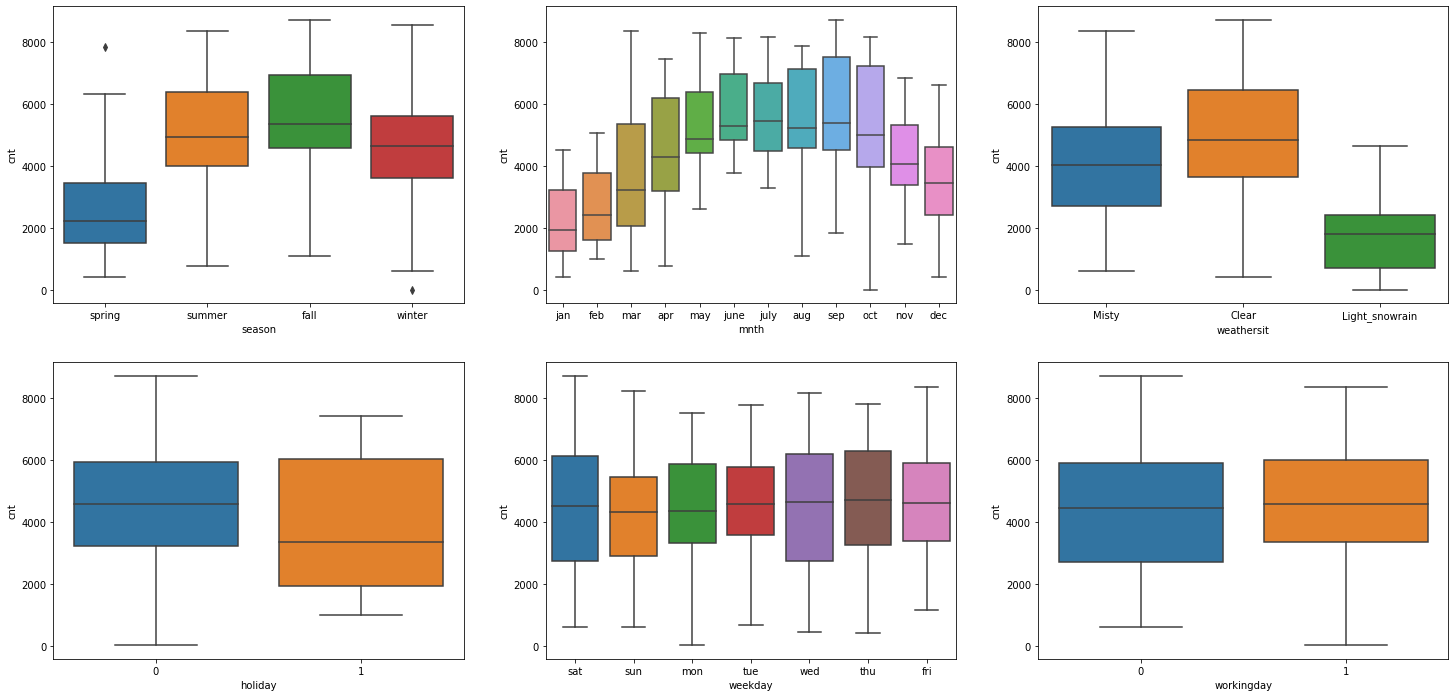

In [366]:
# Visualising Categorical Variable

plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Insights:
1. Season: Most of the bookings were happening on Fall season whereas spring is having less booking. This variable can be good predictor for dependent variable.
2. Mnth: Most of the bookings were happening in the month of June, July, August, September & October while janauary is having less. This variable can be good predictor for dependent variable.
3. Weathersit: Most of the booking were happening in Clear Weather. This variable can be good predictor for dependent variable.
4. Holiday: The data is clearly biased, this indicates that this CANNOT be a good predictore for dependent variable.
5. Weekdays: This variable show very close trend. The variable can have some or no influence towards the predictor.
6. Working Days: Most of the booking were happening on working day. This variable can be good predictor for dependent variable.

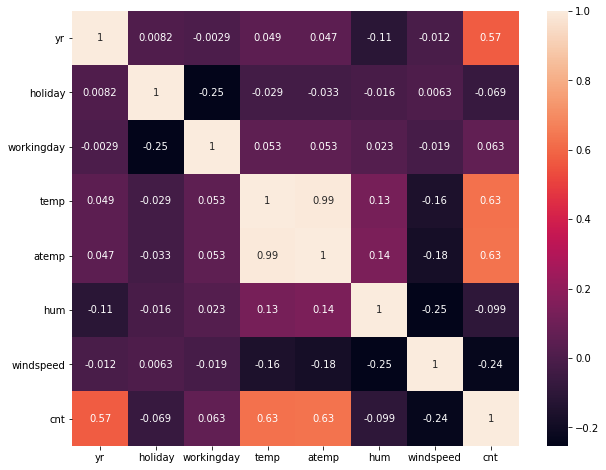

In [367]:
# Visualizing using Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(bike.corr(), annot=True)
plt.show()

#### Insights:
The high correlation between temp & atemp can be observed. We will decide which parameters to keep based on VIF and p-values.

## Data Preparation

In [368]:
# Create Dummy variable

seasons = pd.get_dummies(bike.season, drop_first=True)
months = pd.get_dummies(bike.mnth, drop_first=True)
weekdays = pd.get_dummies(bike.weekday, drop_first=True)
weathers = pd.get_dummies(bike.weathersit, drop_first=True)

In [369]:
# Combining it with our bike dataset

bikes = pd.concat([bike, seasons, months, weekdays, weathers], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [370]:
# information of new data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

In [371]:
bikes.shape

(730, 34)

In [372]:
# Dropping original variable for which the dummy was created
bikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [373]:
bikes.shape

(730, 30)

In [374]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

### Splitting the Dataset for training and testing

In [375]:
# splitting dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [376]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features

In [377]:
scalar = MinMaxScaler()

In [378]:
# Rescaling all numerical variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [379]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [380]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a Linear Model

In [381]:
y_train = df_train.pop('cnt')
X_train = df_train

In [382]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [383]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### RFE: Recursive feature elimination
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [384]:
# Creating a linear model

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [385]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [386]:
# Displaying RFE selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [387]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building Model using Statsmodel

### Model 1

In [388]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### VIF: Recursive feature elimination
A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

In [389]:
# Making function for VIF check

def calculate_VIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [390]:
# VIF check
calculate_VIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
14,Misty,1.57


In [391]:
# Add constant
X_train_lm1  = sm.add_constant(X_train_rfe)

# Create first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [392]:
# Displaying summary of the model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.11e-191
Time:                        13:09:20   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.200      0.000       0.145       0.254
yr                 0.2298      0.008     28.647      0.000       0.214       0.246
holiday           -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday         0.0837      0.010      8.665      0.000       0.065       0.103
temp               0.5277      0.033     15.884      0.000       0.462       0.593
hum               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer             0.0537      0.015      3.631      0.000       0.025       0.083
winter             0.0992      0.017      5.815      0.000       0.066       0.133
july              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                0.0820      0.017      4.966      0.000       0.050       0.114
sat                0.0937      0.012      8.040      0.000       0.071       0.117
sun                0.0406      0.012      3.315      0.001       0.017       0.065
Light_snowrain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty             -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     8.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Insights:
We will have to remove **holiday** variable as it has high p-value.

### Model 2

In [393]:
# Removing holiday variable from the dataframe
X_train_new = X_train_rfe.drop('holiday', 1)

In [394]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,sat,4.91
5,spring,4.80
11,sun,4.76
7,winter,3.69
6,summer,3.04
13,Misty,2.31


In [395]:
# Add constant
X_train_lm2  = sm.add_constant(X_train_new)

# Create second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [396]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.11e-191
Time:                        13:09:30   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1811      0.042      4.301      0.000       0.098       0.264
yr                 0.2298      0.008     28.647      0.000       0.214       0.246
workingday         0.1021      0.025      4.024      0.000       0.052       0.152
temp               0.5277      0.033     15.884      0.000       0.462       0.593
hum               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer             0.0537      0.015      3.631      0.000       0.025       0.083
winter             0.0992      0.017      5.815      0.000       0.066       0.133
july              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                0.0820      0.017      4.966      0.000       0.050       0.114
sat                0.1121      0.027      4.181      0.000       0.059       0.165
sun                0.0591      0.027      2.192      0.029       0.006       0.112
Light_snowrain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty             -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights:
We will have to remove **hum** variable as it has high VIF.

### Model 3

In [397]:
# Removing hum variable from the dataframe
X_train_new = X_train_new.drop('hum', 1)

In [398]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,sat,4.45
10,sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,yr,2.07
7,july,1.60


In [399]:
# Add constant
X_train_lm3  = sm.add_constant(X_train_new)

# Create third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [400]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.28e-188
Time:                        13:12:57   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1008      0.038      2.624      0.009       0.025       0.176
yr                 0.2337      0.008     28.828      0.000       0.218       0.250
workingday         0.1029      0.026      3.983      0.000       0.052       0.154
temp               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer             0.0477      0.015      3.180      0.002       0.018       0.077
winter             0.0846      0.017      4.971      0.000       0.051       0.118
july              -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep                0.0759      0.017      4.537      0.000       0.043       0.109
sat                0.1146      0.027      4.201      0.000       0.061       0.168
sun                0.0567      0.027      2.069      0.039       0.003       0.111
Light_snowrain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Misty             -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights:
We will have remove **workingday** variable as it has high VIF value.

### Model 4

In [401]:
# Removing workingday variable from the dataframe
X_train_new = X_train_new.drop('workingday', 1)

In [402]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,july,1.59
11,Misty,1.55
7,sep,1.33
8,sat,1.22


In [403]:
# Add constant
X_train_lm4  = sm.add_constant(X_train_new)

# Create fourth fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [404]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.06e-186
Time:                        13:15:20   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.030      6.760      0.000       0.142       0.259
yr                 0.2342      0.008     28.467      0.000       0.218       0.250
temp               0.4928      0.033     14.847      0.000       0.428       0.558
windspeed         -0.1513      0.025     -6.025      0.000      -0.201      -0.102
spring            -0.0681      0.021     -3.225      0.001      -0.110      -0.027
summer             0.0481      0.015      3.159      0.002       0.018       0.078
winter             0.0816      0.017      4.731      0.000       0.048       0.116
july              -0.0488      0.019     -2.618      0.009      -0.085      -0.012
sep                0.0723      0.017      4.264      0.000       0.039       0.106
sat                0.0157      0.011      1.370      0.171      -0.007       0.038
sun               -0.0421      0.012     -3.548      0.000      -0.065      -0.019
Light_snowrain    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.170      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights:
We will have remove **sat** variable as it has high p-value.

### Model 5

In [405]:
# Removing sat variable from the dataframe
X_train_new = X_train_new.drop('sat', 1)

In [406]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,july,1.59
10,Misty,1.55
7,sep,1.33
8,sun,1.17


In [407]:
# Add constant
X_train_lm5  = sm.add_constant(X_train_new)

# Create fifth fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [408]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.37e-187
Time:                        13:15:52   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2034      0.030      6.877      0.000       0.145       0.261
yr                 0.2339      0.008     28.414      0.000       0.218       0.250
temp               0.4917      0.033     14.805      0.000       0.426       0.557
windspeed         -0.1497      0.025     -5.963      0.000      -0.199      -0.100
spring            -0.0682      0.021     -3.227      0.001      -0.110      -0.027
summer             0.0479      0.015      3.145      0.002       0.018       0.078
winter             0.0818      0.017      4.739      0.000       0.048       0.116
july              -0.0483      0.019     -2.587      0.010      -0.085      -0.012
sep                0.0723      0.017      4.260      0.000       0.039       0.106
sun               -0.0450      0.012     -3.847      0.000      -0.068      -0.022
Light_snowrain    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.161      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights:
We will have remove **july** variable as it has high p-value.

### Model 6

In [409]:
# Removing july variable from the dataframe
X_train_new = X_train_new.drop('july', 1)

In [410]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,spring,2.00
4,summer,1.91
5,winter,1.64
9,Misty,1.55
6,sep,1.22
7,sun,1.17
8,Light_snowrain,1.08


In [411]:
# Add constant
X_train_lm6  = sm.add_constant(X_train_new)

# Create sixth fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [412]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          5.70e-187
Time:                        13:17:20   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1956      0.030      6.611      0.000       0.137       0.254
yr                 0.2344      0.008     28.324      0.000       0.218       0.251
temp               0.4795      0.033     14.503      0.000       0.415       0.544
windspeed         -0.1498      0.025     -5.935      0.000      -0.199      -0.100
spring            -0.0572      0.021     -2.749      0.006      -0.098      -0.016
summer             0.0623      0.014      4.377      0.000       0.034       0.090
winter             0.0937      0.017      5.599      0.000       0.061       0.127
sep                0.0854      0.016      5.244      0.000       0.053       0.117
sun               -0.0461      0.012     -3.925      0.000      -0.069      -0.023
Light_snowrain    -0.2856      0.025    -11.487      0.000      -0.334      -0.237
Misty             -0.0790      0.009     -8.981      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       79.321   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.654
Skew:                          -0.775   Prob(JB):                     4.91e-46
Kurtosis:                       5.724   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights:
- The **p-values** for all the variables appear to be **significant**, and this model appears to have VERY LOW Multicollinearity between the predictors. We will regard this as our ultimate example for the time being. 

 - From the **VIF calculation** we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

 - From the **lr6** model summary, it is evident that all our coefficients are not equal to zero which means **We REJECT the NULL HYPOTHESIS**.

- The F-Statistics value of 249.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is **significant**

### The equation of best fitted surface based on model lr6:

**cnt** = 0.1956 + (**yr** * 0.2344) + (**temp** * 0.4795) - (**windspeed** * 0.1498) - (**spring** * 0.0572) + (**summer** * 0.0623) + (**winter** * 0.0937) + (**sep** * 0.0854) - (**sun** * 0.0461) - (**Light_snowrain** * 0.2856) - (**Misty** * 0.0790)

## Assumption

### Residual Analysis of the train data

In [413]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

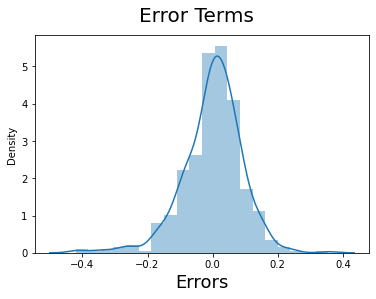

In [414]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Insights
From sbove histogram we can say **the residual are normally distributed**. So, assumptio for Linear Regression is **valid**.

### Multicollinearity Check

In [415]:
# checking VIF
calculate_VIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,spring,2.00
4,summer,1.91
5,winter,1.64
9,Misty,1.55
6,sep,1.22
7,sun,1.17
8,Light_snowrain,1.08


#### Insight
As all the value are below range 5, there is **no multicollinearity** between the predictor variable.

### There is Linear Relationship between x & y

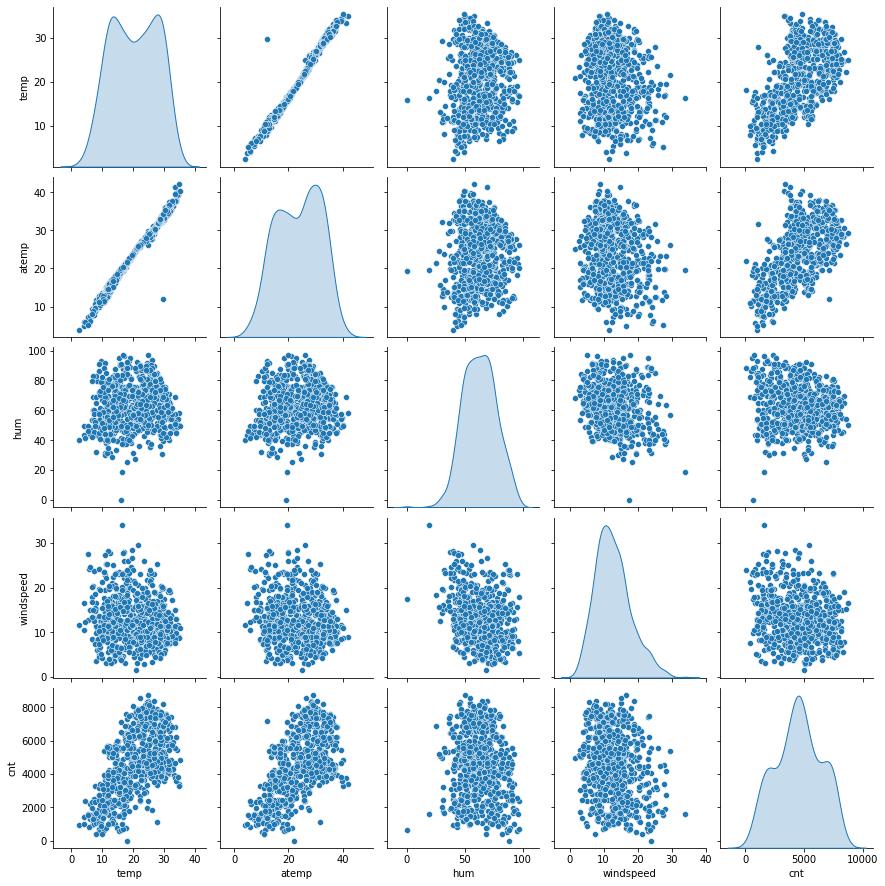

In [424]:
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike[num_var], diag_kind='kde')
plt.show()

#### Insights
There is linear relationship between **'temp' & 'atemp'** variables with predictor **'cnt'**.

## Making Prediction using Final Model

In [416]:
# Applying the scaling on the test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [417]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [418]:
# Dividng into X_test & y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [419]:
# Selecting columns that were used to train our model
X_test = X_test[X_train_new.columns]
X_test.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'sep', 'sun',
       'Light_snowrain', 'Misty'],
      dtype='object')

In [420]:
# Adding constant to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   spring          220 non-null    uint8  
 5   summer          220 non-null    uint8  
 6   winter          220 non-null    uint8  
 7   sep             220 non-null    uint8  
 8   sun             220 non-null    uint8  
 9   Light_snowrain  220 non-null    uint8  
 10  Misty           220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [421]:
# Making prediction using final model

y_pred = lr6.predict(X_test_lm)

## Model Evaluation

In [426]:
# r2 value test
r2 = r2_score(y_test, y_pred)
r2

0.8031908103816627

In [433]:
# Adjusted r2 value for test data

adj_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1),4)
adj_r2

0.7938

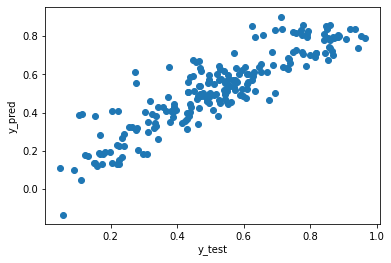

In [428]:
# Plotting y_test v/s y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

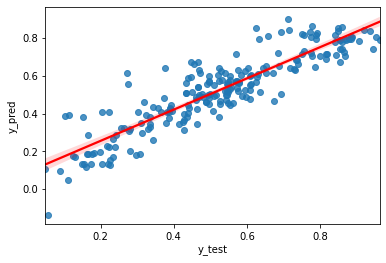

In [432]:
# Plotting Regression PLot
fig = plt.figure()
sns.regplot(y_test, y_pred, line_kws={'color': 'red'}, fit_reg=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Final Report

In [425]:
lr6.params

const             0.195618
yr                0.234391
temp              0.479457
windspeed        -0.149843
spring           -0.057246
summer            0.062339
winter            0.093716
sep               0.085435
sun              -0.046099
Light_snowrain   -0.285587
Misty            -0.078980
dtype: float64

#### The top three predictor variables are - 
1. **Tempreture(temp)** - with the coefficient value 0.479457 indicates that the increase in temp variable increases the bike booking by 0.479457.
2. **Light Snow(Light_snowrain)** - with the coefficient value -0.285587 indicates that the increase in yr variable decreases the bike booking by 0.285587.
3. **Year(yr)** - with the coefficient value 0.234391 indicates that the increase in yr variable increases the bike booking by 0.234391.

#### Results - 
1. r2 for test data - 0.8031908103816627
1. Adjusted R2 for test data - 0.7938